In [1]:
%matplotlib notebook


In [19]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
import datetime

In [20]:
# Read in csv file
pollution_data = pd.read_csv("https://raw.githubusercontent.com/khartmann5/Project_01/chris_stuff/Resources/Collected_Pollution_Measurements.csv")
pollution_data.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [28]:
la_data = pollution_data.loc[pollution_data["City"] =='Los Angeles']

la_data

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
2788,2021-01-31 12:00:00,514.03,26.82,42.16,0.01,4.89,24.73,35.64,5.13,3.0,Los Angeles,12.176151,32.657143,1019978.0
2789,2021-01-31 11:00:00,547.41,28.61,47.30,0.01,4.59,28.40,40.54,5.26,4.0,Los Angeles,12.176151,32.657143,1019978.0
2790,2021-01-31 10:00:00,647.54,37.10,55.52,0.00,4.35,36.10,50.67,5.83,4.0,Los Angeles,12.176151,32.657143,1019978.0
2791,2021-01-31 09:00:00,867.84,61.69,70.60,0.00,4.47,51.42,70.83,7.73,5.0,Los Angeles,12.176151,32.657143,1019978.0
2792,2021-01-31 08:00:00,1255.04,105.50,93.22,0.00,4.89,74.82,102.16,12.16,5.0,Los Angeles,12.176151,32.657143,1019978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,2021-01-01 16:00:00,1615.52,182.39,85.68,0.40,7.39,63.08,87.80,20.27,5.0,Los Angeles,12.176151,32.657143,1019978.0
3481,2021-01-01 15:00:00,961.30,86.73,60.32,0.00,5.42,35.31,50.89,10.01,4.0,Los Angeles,12.176151,32.657143,1019978.0
3482,2021-01-01 14:00:00,620.84,38.45,47.30,0.00,4.47,20.31,31.14,4.75,3.0,Los Angeles,12.176151,32.657143,1019978.0
3483,2021-01-01 13:00:00,574.11,31.29,46.61,0.01,3.93,18.90,29.46,3.64,2.0,Los Angeles,12.176151,32.657143,1019978.0


In [29]:
type(la_data["datetime"][0])


KeyError: 0

In [30]:

df = la_data.sort_values("datetime")
df

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
3484,2021-01-01 12:00:00,600.82,32.63,49.35,0.01,3.76,20.12,31.79,3.61,3.0,Los Angeles,12.176151,32.657143,1019978.0
3483,2021-01-01 13:00:00,574.11,31.29,46.61,0.01,3.93,18.90,29.46,3.64,2.0,Los Angeles,12.176151,32.657143,1019978.0
3482,2021-01-01 14:00:00,620.84,38.45,47.30,0.00,4.47,20.31,31.14,4.75,3.0,Los Angeles,12.176151,32.657143,1019978.0
3481,2021-01-01 15:00:00,961.30,86.73,60.32,0.00,5.42,35.31,50.89,10.01,4.0,Los Angeles,12.176151,32.657143,1019978.0
3480,2021-01-01 16:00:00,1615.52,182.39,85.68,0.40,7.39,63.08,87.80,20.27,5.0,Los Angeles,12.176151,32.657143,1019978.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,2021-01-31 08:00:00,1255.04,105.50,93.22,0.00,4.89,74.82,102.16,12.16,5.0,Los Angeles,12.176151,32.657143,1019978.0
2791,2021-01-31 09:00:00,867.84,61.69,70.60,0.00,4.47,51.42,70.83,7.73,5.0,Los Angeles,12.176151,32.657143,1019978.0
2790,2021-01-31 10:00:00,647.54,37.10,55.52,0.00,4.35,36.10,50.67,5.83,4.0,Los Angeles,12.176151,32.657143,1019978.0
2789,2021-01-31 11:00:00,547.41,28.61,47.30,0.01,4.59,28.40,40.54,5.26,4.0,Los Angeles,12.176151,32.657143,1019978.0


In [31]:
time = pd.to_datetime(df["datetime"])
la_data["date"] = time.dt.date
mean_df = la_data.groupby("date").mean().reset_index()
mean_df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Public Transportation Rate,Median Age,Population
0,2021-01-01,1401.344167,140.183333,97.333333,15.845000,14.489167,61.091667,80.423333,16.774167,4.083333,12.176151,32.657143,1019978.0
1,2021-01-02,1216.510833,114.074167,75.342500,16.335417,9.375417,51.966667,67.333333,7.667917,4.000000,12.176151,32.657143,1019978.0
2,2021-01-03,1457.950000,146.855417,75.771250,19.173750,10.326250,81.845833,100.330417,7.641250,4.750000,12.176151,32.657143,1019978.0
3,2021-01-04,1431.107083,111.002083,117.354583,21.647917,18.979583,121.406250,144.278750,8.749167,4.958333,12.176151,32.657143,1019978.0
4,2021-01-05,1425.267500,119.117083,107.872083,9.164583,14.219167,103.637500,120.881667,4.761667,4.958333,12.176151,32.657143,1019978.0
5,2021-01-06,1848.896250,183.749583,140.661250,8.845833,20.937500,113.381250,142.134583,16.930833,4.750000,12.176151,32.657143,1019978.0
6,2021-01-07,1982.410000,213.841250,117.526250,2.871667,13.736667,104.485000,137.422500,14.467917,4.875000,12.176151,32.657143,1019978.0
7,2021-01-08,1978.794583,205.095833,134.520833,13.539167,19.128750,110.702083,140.937500,10.899583,4.791667,12.176151,32.657143,1019978.0
8,2021-01-09,1400.511250,106.702083,121.753750,16.870833,14.779583,93.432083,116.748750,11.025833,4.583333,12.176151,32.657143,1019978.0
9,2021-01-10,1143.772917,87.447083,96.235000,12.793333,12.990000,55.202083,72.536667,9.600000,4.000000,12.176151,32.657143,1019978.0


<IPython.core.display.Javascript object>


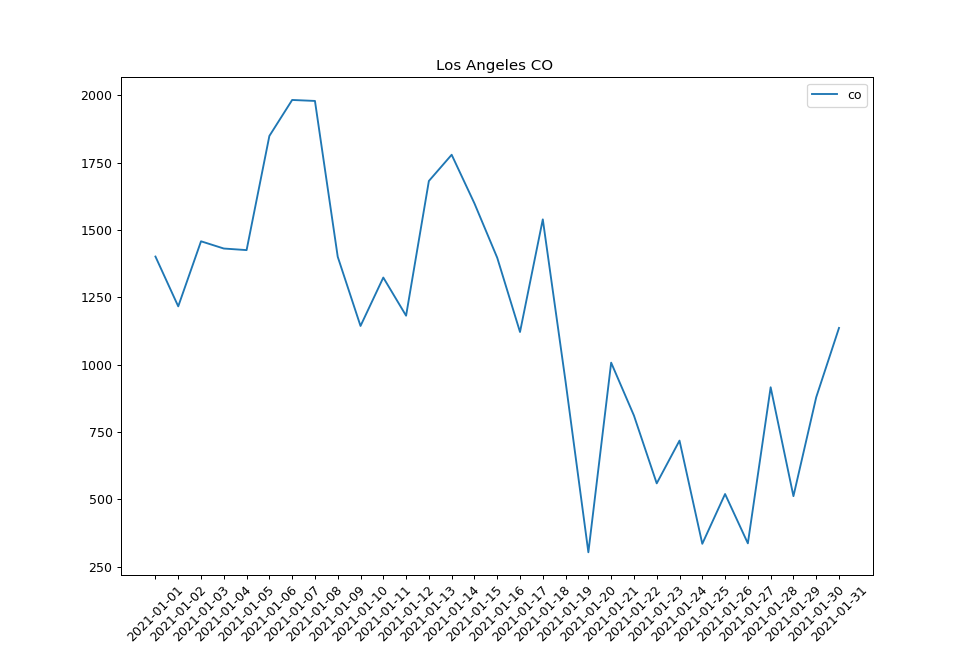

In [53]:

ax = mean_df.plot(x="date", y="co", figsize=(12, 8),rot=45);
ax.set_xticks(mean_df["date"])
ax.set_title('Los Angeles CO ')
# ax.set_xticklabels(mean_df["date"])
plt.show()

In [25]:
plt.xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])

(16096.0, 16102.0)

In [ ]:
la_data = pollution_data.loc[pollution_data["City"] =='Los Angeles']

la_data